# Imports

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import ttest_ind, mannwhitneyu

from pathlib import Path

# Carregando e Checando os dados.

In [2]:
data_path = Path('../data')

imi_risk_guard = pd.read_excel(data_path / 'IMI_RiskGuard.xlsx')
imi_tradicional = pd.read_excel(data_path / 'IMI_AulaTradicional.xlsx')

In [3]:
imi_risk_guard.iloc[:, 2:].head()

,Eu gostei muito de fazer a atividade.,Eu me esforcei/dediquei bastante para realizar a atividade.,Essa foi uma atividade que não consegui fazer muito bem.,Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.,Eu estava ansioso enquanto trabalhava na atividade.,Eu descreveria a atividade como muito interessante.,Acho que me saí muito bem na atividade em comparação a outros alunos.,Acho que essa é uma atividade importante.,Não me esforcei muito em ir bem na atividade.,A atividade não prendeu/manteve minha atenção de forma alguma.,...,Era importante para mim me sair bem na atividade.,Depois de trabalhar na atividade por algum tempo me senti bastante competente.,Enquanto fazia a atividade pensava no quanto gostei dela.,Não me senti nem um pouco nervoso enquanto fazia a atividade.,"Acho que a atividade é importante, pois ela pode auxiliar no ensino e aprendizagem de vulnerabilidades de software e padrões de segurança para sistemas web.",Eu não coloquei muita energia/dedicação na realização da atividade.,Me sinti pressionado enquanto realizava a atividade.,Acho que sou muito bom nessa atividade.,Me empenhei muito na atividade.,Achei a atividade chata.
0,6,6,2,7,4,6,6,6,2,2,...,5,6,6,4,6,2,5,6,6,1
1,7,7,6,7,3,6,6,7,7,5,...,6,7,6,3,6,2,2,7,6,1
2,7,7,3,7,1,7,7,7,1,1,...,7,7,7,1,7,1,1,7,7,1
3,5,7,5,3,1,6,5,5,1,1,...,7,4,3,6,5,1,1,5,7,1
4,6,6,1,6,1,5,5,7,4,2,...,1,5,3,1,3,5,1,5,1,1


In [4]:
imi_tradicional.iloc[:, 2:].head()

,Eu gostei muito de fazer a atividade.,Eu me esforcei/dediquei bastante para realizar a atividade.,Essa foi uma atividade que não consegui fazer muito bem.,Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.,Eu estava ansioso enquanto trabalhava na atividade.,Eu descreveria a atividade como muito interessante.,Acho que me saí muito bem na atividade em comparação a outros alunos.,Acho que essa é uma atividade importante.,Não me esforcei muito em ir bem na atividade.,A atividade não prendeu/manteve minha atenção de forma alguma.,...,Era importante para mim me sair bem na atividade.,Depois de trabalhar na atividade por algum tempo me senti bastante competente.,Enquanto fazia a atividade pensava no quanto gostei dela.,Não me senti nem um pouco nervoso enquanto fazia a atividade.,"Acho que a atividade é importante, pois ela pode auxiliar no ensino e aprendizagem de vulnerabilidades de software e padrões de segurança para sistemas web.",Eu não coloquei muita energia/dedicação na realização da atividade.,Me sinti pressionado enquanto realizava a atividade.,Acho que sou muito bom nessa atividade.,Me empenhei muito na atividade.,Achei a atividade chata.
0,4,4,5,5,7,3,3,5,5,4,...,7,4,2,3,5,5,5,3,2,6
1,4,3,1,5,1,3,5,6,1,4,...,1,1,1,7,4,6,1,5,1,4
2,2,4,4,6,1,3,5,6,2,3,...,4,3,1,4,6,4,3,4,6,3
3,7,7,7,7,5,7,5,7,3,3,...,7,6,7,4,5,4,2,5,6,1
4,7,6,1,7,2,7,3,7,5,1,...,6,6,6,7,7,2,1,5,6,1


In [5]:
imi_risk_guard.isna().sum()

Carimbo de data/hora                                                                                                                                            0
Qual o seu nome completo?                                                                                                                                       0
Eu gostei muito de fazer a atividade.                                                                                                                           0
Eu me esforcei/dediquei bastante para realizar a atividade.                                                                                                     0
Essa foi uma atividade que não consegui fazer muito bem.                                                                                                        0
Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.                                            0
Eu estava ansioso enquanto t

In [6]:
imi_tradicional.isna().sum()

Carimbo de data/hora                                                                                                                                            0
Qual o seu nome completo?                                                                                                                                       0
Eu gostei muito de fazer a atividade.                                                                                                                           0
Eu me esforcei/dediquei bastante para realizar a atividade.                                                                                                     0
Essa foi uma atividade que não consegui fazer muito bem.                                                                                                        0
Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.                                            0
Eu estava ansioso enquanto t

Todas as afirmações:

- Eu gostei muito de fazer a atividade.
- Eu me esforcei/dediquei bastante para realizar a atividade.
- Essa foi uma atividade que não consegui fazer muito bem.
- Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.
- Eu estava ansioso enquanto trabalhava na atividade.
- Eu descreveria a atividade como muito interessante.
- Acho que me saí muito bem na atividade em comparação a outros alunos.
- Acho que essa é uma atividade importante.
- Não me esforcei muito em ir bem na atividade.
- A atividade não prendeu/manteve minha atenção de forma alguma.
- Eu fui bastante competente na atividade.
- Acredito que ter feito essa atividade foi benefica para mim.
- Eu me sinto muito tenso ao fazer a atividade.
- Achei a atividade bastante agradável.
- Ter realizado essa atividade me ajudou a aprender sobre vulnerabilidades de software e padrões de segurança para sistemas web.
- Estou satisfeito com o meu desempenho na atividade.
- Estaria disposto a realizar a atividade novamente, pois ela tem valor/utilidade para mim.
- Eu estava muito tranquilo ao fazer a atividade.
- A atividade foi divertida de fazer.
- Eu acredito que a atividade poderá ter algum valor/utilidade para mim.
- Era importante para mim me sair bem na atividade.
- Depois de trabalhar na atividade por algum tempo me senti bastante competente.
- Enquanto fazia a atividade pensava no quanto gostei dela.
- Não me senti nem um pouco nervoso enquanto fazia a atividade.
- Acho que a atividade é importante, pois ela pode auxiliar no ensino e aprendizagem de vulnerabilidades de software e padrões de segurança para sistemas web.
- Eu não coloquei muita energia/dedicação na realização da atividade.
- Me sinti pressionado enquanto realizava a atividade.
- Acho que sou muito bom nessa atividade.
- Me empenhei muito na atividade.
- Achei a atividade chata.

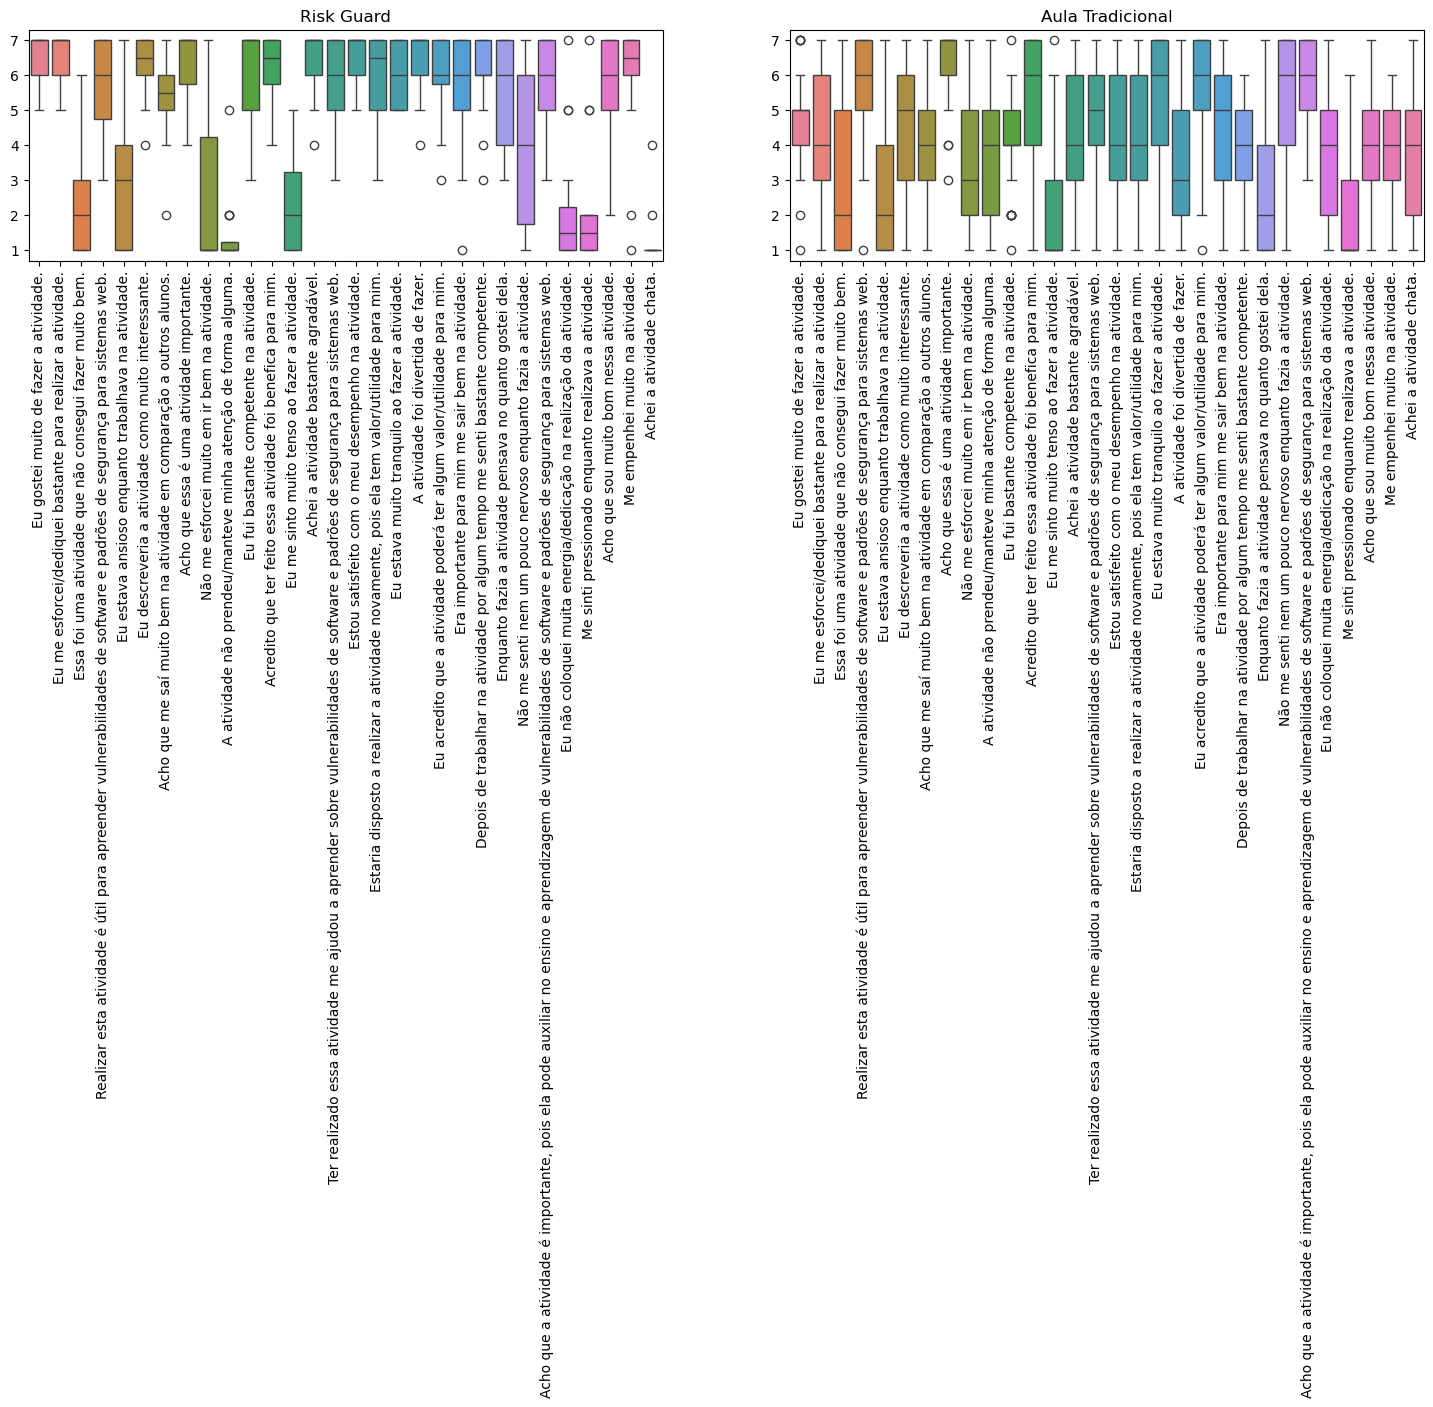

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(data=imi_risk_guard, ax=ax[0])
ax[0].set_title("Risk Guard")
ax[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=imi_tradicional, ax=ax[1])
ax[1].set_title("Aula Tradicional")
ax[1].tick_params(axis='x', rotation=90)

plt.show()

In [8]:
def verificar_normalidade(dataframe, nome_grupo):
    print(f"\nNormalidade para o {nome_grupo}:\n")
    resultados = []

    for coluna in dataframe.columns:
        dados = dataframe[coluna].dropna()  # remove valores ausentes
        if len(dados) < 3:
            print(f"{coluna}: dados insuficientes para o teste de Shapiro-Wilk")
            continue
        stat, p = shapiro(dados)
        resultados.append({
            'Afirmação': coluna,
            'W': stat,
            'p-valor': round(p, 3),
            'Normal': 'Sim' if p > 0.05 else 'Não'
        })

    resultados_df = pd.DataFrame(resultados)
    display(resultados_df)
    return resultados_df


normalidade_imi_risk_guard = verificar_normalidade(imi_risk_guard.iloc[:, 2:], 'Grupo 1 (Risk Guard')


Normalidade para o Grupo 1 (Risk Guard:



,Afirmação,W,p-valor,Normal
0,Eu gostei muito de fazer a atividade.,0.696749,0.000,Não
1,Eu me esforcei/dediquei bastante para realizar...,0.732151,0.000,Não
2,Essa foi uma atividade que não consegui fazer ...,0.827827,0.007,Não
3,Realizar esta atividade é útil para apreender ...,0.796203,0.002,Não
4,Eu estava ansioso enquanto trabalhava na ativi...,0.899318,0.078,Sim
5,Eu descreveria a atividade como muito interess...,0.786226,0.002,Não
6,Acho que me saí muito bem na atividade em comp...,0.860166,0.019,Não
7,Acho que essa é uma atividade importante.,0.718135,0.000,Não
8,Não me esforcei muito em ir bem na atividade.,0.713546,0.000,Não
9,A atividade não prendeu/manteve minha atenção ...,0.490903,0.000,Não


In [9]:
normalidade_imi_tradicional = verificar_normalidade(imi_tradicional.iloc[:, 2:], 'Grupo 2 (Aula Tradicional)')


Normalidade para o Grupo 2 (Aula Tradicional):



,Afirmação,W,p-valor,Normal
0,Eu gostei muito de fazer a atividade.,0.932428,0.027,Não
1,Eu me esforcei/dediquei bastante para realizar...,0.941579,0.052,Sim
2,Essa foi uma atividade que não consegui fazer ...,0.823497,0.000,Não
3,Realizar esta atividade é útil para apreender ...,0.788584,0.000,Não
4,Eu estava ansioso enquanto trabalhava na ativi...,0.833051,0.000,Não
5,Eu descreveria a atividade como muito interess...,0.910401,0.006,Não
6,Acho que me saí muito bem na atividade em comp...,0.943175,0.058,Sim
7,Acho que essa é uma atividade importante.,0.743712,0.000,Não
8,Não me esforcei muito em ir bem na atividade.,0.902150,0.003,Não
9,A atividade não prendeu/manteve minha atenção ...,0.934096,0.030,Não


# Testes estatísticos para verificar a diferença entre o jogo Risk Guard e a Aula Tradicional em cada afirmação.

- Tamanho do efeito positivo quer dizer que no Risk Guard é maior.

In [10]:
# Unifica os resultados de normalidade dos dois grupos
normalidade_dict1 = dict(zip(normalidade_imi_risk_guard['Afirmação'], normalidade_imi_risk_guard['Normal']))
normalidade_dict2 = dict(zip(normalidade_imi_tradicional['Afirmação'], normalidade_imi_tradicional['Normal']))

resultados_comparacao = []

for coluna in imi_risk_guard.iloc[:, 2:].columns:
    dados1 = imi_risk_guard.iloc[:, 2:][coluna].dropna()
    dados2 = imi_tradicional.iloc[:, 2:][coluna].dropna()
    
    # Verifica se os dois grupos têm distribuição normal
    normal1 = normalidade_dict1.get(coluna) == 'Sim'
    normal2 = normalidade_dict2.get(coluna) == 'Sim'
    
    if normal1 and normal2:
        # Teste t de Student (paramétrico)
        n1, n2 = len(dados1), len(dados2)
        m1, m2 = dados1.mean(), dados2.mean()
        s1, s2 = dados1.std(ddof=1), dados2.std(ddof=1)

        # Teste t de Student (assumindo variâncias diferentes)
        t_stat, p = ttest_ind(dados1, dados2, equal_var=False)

        # Pooled standard deviation (usado para o cálculo de d)
        pooled_sd = (((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)) ** 0.5

        # Cohen's d
        d = (m1 - m2) / pooled_sd
        teste_usado = 't de Student'
        resultados_comparacao.append({
            'Afirmação': coluna,
            'Estatística': t_stat,
            'Teste': teste_usado,
            'p-valor': round(p, 3),
            'Tamanho do efeito (r)': round(d, 3),
            'Interpretação do efeito': (
                'Pequeno' if abs(d) < 0.2 else
                'Médio' if abs(d) < 0.5 else
                'Grande'
            ),
            'Diferença significativa': 'Sim' if p < 0.05 else 'Não'
        })
    else:
        # Teste de Mann-Whitney U (não-paramétrico)
        stat, p = mannwhitneyu(dados1, dados2, alternative='two-sided')
        teste_usado = 'Mann-Whitney U'
        n1, n2 = len(dados1), len(dados2)
        N = n1 + n2
        mean_U = n1 * n2 / 2
        std_U = ((n1 * n2 * (n1 + n2 + 1)) / 12) ** 0.5
        z = (stat - mean_U) / std_U
        
        # Tamanho do efeito r
        r = z / N**0.5
    
        resultados_comparacao.append({
            'Afirmação': coluna,
            'Teste': teste_usado,
            'Estatística': stat,
            'p-valor': round(p, 3),
            'Tamanho do efeito (r)': round(r, 3),
            'Interpretação do efeito': (
                'Pequeno' if abs(r) < 0.1 else
                'Médio' if abs(r) < 0.3 else
                'Grande'
            ),
            'Diferença significativa': 'Sim' if p < 0.05 else 'Não'
        })

# Resultado final
resultados_df = pd.DataFrame(resultados_comparacao)

In [11]:
print("\nResultados da comparação entre grupos:\n")
resultados_df


Resultados da comparação entre grupos:



,Afirmação,Teste,Estatística,p-valor,Tamanho do efeito (r),Interpretação do efeito,Diferença significativa
0,Eu gostei muito de fazer a atividade.,Mann-Whitney U,522.0,0.000,0.601,Grande,Sim
1,Eu me esforcei/dediquei bastante para realizar...,Mann-Whitney U,510.0,0.000,0.570,Grande,Sim
2,Essa foi uma atividade que não consegui fazer ...,Mann-Whitney U,277.5,0.718,-0.049,Pequeno,Não
3,Realizar esta atividade é útil para apreender ...,Mann-Whitney U,302.0,0.911,0.016,Pequeno,Não
4,Eu estava ansioso enquanto trabalhava na ativi...,Mann-Whitney U,320.5,0.632,0.065,Pequeno,Não
5,Eu descreveria a atividade como muito interess...,Mann-Whitney U,473.5,0.000,0.472,Grande,Sim
6,Acho que me saí muito bem na atividade em comp...,Mann-Whitney U,483.5,0.000,0.499,Grande,Sim
7,Acho que essa é uma atividade importante.,Mann-Whitney U,290.0,0.906,-0.016,Pequeno,Não
8,Não me esforcei muito em ir bem na atividade.,Mann-Whitney U,208.0,0.083,-0.234,Médio,Não
9,A atividade não prendeu/manteve minha atenção ...,Mann-Whitney U,74.5,0.000,-0.589,Grande,Sim


In [12]:
interesse_engajamento_prazer = ['Eu gostei muito de fazer a atividade.', 'Eu descreveria a atividade como muito interessante.',
              'A atividade foi divertida de fazer.', 'Enquanto fazia a atividade pensava no quanto gostei dela.',
              'Achei a atividade bastante agradável.', 'A atividade foi divertida de fazer.']

competencia_autoeficacia_desempenho = [
    "Eu fui bastante competente na atividade.",
    "Depois de trabalhar na atividade por algum tempo me senti bastante competente.",
    "Estou satisfeito com o meu desempenho na atividade.",
    "Acho que me saí muito bem na atividade em comparação a outros alunos.",
    "Acho que sou muito bom nessa atividade.",
    "Essa foi uma atividade que não consegui fazer muito bem."  
]

esforco_dedicacao_energia = [
    "Eu me esforcei/dediquei bastante para realizar a atividade.",
    "Me empenhei muito na atividade.",
    "Não me esforcei muito em ir bem na atividade.",  
    "Eu não coloquei muita energia/dedicação na realização da atividade.",  
    "Era importante para mim me sair bem na atividade."
]

ansiedade_tranquilidade_pressao = [
    "Eu estava ansioso enquanto trabalhava na atividade.",
    "Eu me sinto muito tenso ao fazer a atividade.",
    "Me senti pressionado enquanto realizava a atividade.",
    "Não me senti nem um pouco nervoso enquanto fazia a atividade.",  
    "Eu estava muito tranquilo ao fazer a atividade."  
]

desinteresse_desmotivacao = [
    "A atividade não prendeu/manteve minha atenção de forma alguma.",  
    "Achei a atividade chata."  
]

valor_utilidade_importancia = [
    "Eu acredito que a atividade poderá ter algum valor/utilidade para mim.",
    "Estaria disposto a realizar a atividade novamente, pois ela tem valor/utilidade para mim.",
    "Acho que essa é uma atividade importante.",
    "Acredito que ter feito essa atividade foi benéfica para mim.",
    "Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.",
    "Ter realizado essa atividade me ajudou a aprender sobre vulnerabilidades de software e padrões de segurança para sistemas web.",
    "Acho que a atividade é importante, pois ela pode auxiliar no ensino e aprendizagem de vulnerabilidades de software e padrões de segurança para sistemas web."
]

In [13]:
print("Resultados para o grupo de Intesse / Engajamento / Prazer")
resultados_df[resultados_df['Afirmação'].isin(interesse_engajamento_prazer)]

Resultados para o grupo de Intesse / Engajamento / Prazer


,Afirmação,Teste,Estatística,p-valor,Tamanho do efeito (r),Interpretação do efeito,Diferença significativa
0,Eu gostei muito de fazer a atividade.,Mann-Whitney U,522.0,0.0,0.601,Grande,Sim
5,Eu descreveria a atividade como muito interess...,Mann-Whitney U,473.5,0.0,0.472,Grande,Sim
13,Achei a atividade bastante agradável.,Mann-Whitney U,501.0,0.0,0.546,Grande,Sim
18,A atividade foi divertida de fazer.,Mann-Whitney U,547.5,0.0,0.669,Grande,Sim
22,Enquanto fazia a atividade pensava no quanto g...,Mann-Whitney U,505.5,0.0,0.558,Grande,Sim


- Para o grupo de Intesse / Engajamento / Prazer, temos um tamanho do efeito grande e diferença significativa em todas as afirmações. Isso indica que o jogo proporcionou uma experiência significativamente mais envolvente e agradável do que a aula tradicional. 

In [14]:
print("Resultados para o grupo de Competência / Autoeficácia / Desempenho")
resultados_df[resultados_df['Afirmação'].isin(competencia_autoeficacia_desempenho)]

Resultados para o grupo de Competência / Autoeficácia / Desempenho


,Afirmação,Teste,Estatística,p-valor,Tamanho do efeito (r),Interpretação do efeito,Diferença significativa
2,Essa foi uma atividade que não consegui fazer ...,Mann-Whitney U,277.5,0.718,-0.049,Pequeno,Não
6,Acho que me saí muito bem na atividade em comp...,Mann-Whitney U,483.5,0.000,0.499,Grande,Sim
10,Eu fui bastante competente na atividade.,Mann-Whitney U,502.0,0.000,0.548,Grande,Sim
15,Estou satisfeito com o meu desempenho na ativi...,Mann-Whitney U,504.0,0.000,0.554,Grande,Sim
21,Depois de trabalhar na atividade por algum tem...,Mann-Whitney U,514.5,0.000,0.581,Grande,Sim
27,Acho que sou muito bom nessa atividade.,Mann-Whitney U,465.0,0.001,0.450,Grande,Sim


- Para o grupo de Competência / Autoeficácia / Desempenho, temos um tamanho do efeito grande e diferença significativa em quase todas as afirmações. Isso sugere que o jogo contribuiu para que os participantes se sentissem mais capazes e confiantes em seu desempenho, indicando um impacto positivo na percepção de autoeficácia em comparação à aula tradicional. Apenas na afirmação: "Essa foi uma atividade que não consegui fazer muito bem" não houve uma diferença significativa, apresentando um contraste em relação às outras afirmações.

In [15]:
print("Resultados para o grupo de Ansiedade / Tranquilidade / Pressão")
resultados_df[resultados_df['Afirmação'].isin(ansiedade_tranquilidade_pressao)]

Resultados para o grupo de Ansiedade / Tranquilidade / Pressão


,Afirmação,Teste,Estatística,p-valor,Tamanho do efeito (r),Interpretação do efeito,Diferença significativa
4,Eu estava ansioso enquanto trabalhava na ativi...,Mann-Whitney U,320.5,0.632,0.065,Pequeno,Não
12,Eu me sinto muito tenso ao fazer a atividade.,Mann-Whitney U,321.0,0.614,0.067,Pequeno,Não
17,Eu estava muito tranquilo ao fazer a atividade.,Mann-Whitney U,367.0,0.158,0.189,Médio,Não
23,Não me senti nem um pouco nervoso enquanto faz...,Mann-Whitney U,198.5,0.054,-0.259,Médio,Não


- Para o grupo de Ansiedade / Tranquilidade / Pressão, nenhum resultado apresentou diferença significativa entre os grupos. Isso indica que o tipo de atividade (jogo ou aula tradicional) não impactou de forma relevante o nível de ansiedade ou tranquilidade relatado pelos participantes durante a realização da tarefa.

In [16]:
print("Resultados para o grupo de Desinteresse / Desmotivação")
resultados_df[resultados_df['Afirmação'].isin(desinteresse_desmotivacao)]

Resultados para o grupo de Desinteresse / Desmotivação


,Afirmação,Teste,Estatística,p-valor,Tamanho do efeito (r),Interpretação do efeito,Diferença significativa
9,A atividade não prendeu/manteve minha atenção ...,Mann-Whitney U,74.5,0.0,-0.589,Grande,Sim
29,Achei a atividade chata.,Mann-Whitney U,86.5,0.0,-0.558,Grande,Sim


- Resultados para o grupo de Desinteresse / Desmotivação, nas duas afirmações houveram diferença significativa e uma tamanho do efeito grande (e negativo, ou seja, aula tradicional recebeu nota maior). Isso sugere que os participantes do grupo que jogou relataram significativamente menos desmotivação e desinteresse em comparação aos que participaram da aula tradicional, reforçando o potencial do jogo em manter o foco e a atenção dos alunos.

In [17]:
print("Resultados para o grupo de Esforço / Dedicação / Energia")
resultados_df[resultados_df['Afirmação'].isin(esforco_dedicacao_energia)]

Resultados para o grupo de Esforço / Dedicação / Energia


,Afirmação,Teste,Estatística,p-valor,Tamanho do efeito (r),Interpretação do efeito,Diferença significativa
1,Eu me esforcei/dediquei bastante para realizar...,Mann-Whitney U,510.0,0.000,0.570,Grande,Sim
8,Não me esforcei muito em ir bem na atividade.,Mann-Whitney U,208.0,0.083,-0.234,Médio,Não
20,Era importante para mim me sair bem na atividade.,Mann-Whitney U,385.0,0.081,0.237,Médio,Não
25,Eu não coloquei muita energia/dedicação na rea...,Mann-Whitney U,128.0,0.001,-0.447,Grande,Sim
28,Me empenhei muito na atividade.,Mann-Whitney U,497.0,0.000,0.535,Grande,Sim


- Para o grupo de Esforço / Dedicação / Energia, três das cinco afirmações apresentaram diferença significativa com tamanho do efeito grande. Uma dessas foi "Eu não coloquei muita energia/dedicação na realização da atividade", que teve efeito negativo — indicando que os participantes da aula tradicional relataram maior dedicação nesse item específico. No geral, porém, os dados apontam que o jogo foi associado a maiores níveis de esforço e envolvimento na maioria das afirmações.

In [18]:
print("Resultados para o grupo de Valor / Utilidade / Importância")
resultados_df[resultados_df['Afirmação'].isin(valor_utilidade_importancia)]

Resultados para o grupo de Valor / Utilidade / Importância


,Afirmação,Teste,Estatística,p-valor,Tamanho do efeito (r),Interpretação do efeito,Diferença significativa
3,Realizar esta atividade é útil para apreender ...,Mann-Whitney U,302.0,0.911,0.016,Pequeno,Não
7,Acho que essa é uma atividade importante.,Mann-Whitney U,290.0,0.906,-0.016,Pequeno,Não
14,Ter realizado essa atividade me ajudou a apren...,Mann-Whitney U,384.5,0.081,0.236,Médio,Não
16,Estaria disposto a realizar a atividade novame...,Mann-Whitney U,447.5,0.003,0.403,Grande,Sim
19,Eu acredito que a atividade poderá ter algum v...,Mann-Whitney U,319.0,0.650,0.061,Pequeno,Não
24,"Acho que a atividade é importante, pois ela po...",Mann-Whitney U,281.5,0.775,-0.039,Pequeno,Não


- Já para o grupo de Valor / Utilidade / Importância, apenas a afirmação "Estaria disposto a realizar a atividade novamente, pois ela tem valor/utilidade para mim." apresentou diferença significativa, com tamanho do efeito grande. Isso indica que, embora a maioria das percepções sobre valor e utilidade tenha sido semelhante entre os participantes da Aula Tradicional e Risk Guard, o jogo gerou uma maior disposição dos participantes em repetir a atividade, sugerindo uma percepção de utilidade mais prática ou motivacional.